# Création des profils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

import scienceplots

plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 14,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 12, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 12, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 12, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

On se placera dans toute la suite à $h=7mm$ et à base $a_0 = 4mm$ donc à aire $A=a_0\times h$ fixée. On considère des profils qui ont tous la même base $a_0$

In [2]:
h = 7e-3
a0 = 4e-3

In [3]:
def a_cone(a0, beta, z):
    return a0*(1+beta*z)

In [4]:
def a_exp(a0, lamb, z):
    return a0*np.exp(lamb*z)

### Condition d'aire pour le cône

In [5]:
def find_tronq_cone(h, beta):
    return -1/beta + 1/beta * np.sqrt(1+2*beta*h)

In [6]:
def find_beta_cone(h, h_tronq):
    return 2/(h_tronq**2)*(h-h_tronq)

### Condition d'aire pour l'exponentielle

In [7]:
def find_lamb_exp(h, h_tronq, initial_guess=1):
    """
    Trouve la valeur de lambda qui satisfait l'équation donnée pour des valeurs de h et n.

    Parameters:
    h (float): Valeur de h.
    n (float): Valeur de n.
    initial_guess (float): Estimation initiale pour lambda. Par défaut à 1.0.

    Returns:
    float: Valeur de lambda qui satisfait l'équation.
    """
    
    # Définir la fonction qui représente l'équation
    def equation(lambda_):
        return h - (1/(lambda_)) * (np.exp(lambda_ * h_tronq) - 1)

    # Résoudre l'équation
    lambda_solution, = fsolve(equation, initial_guess)

    return lambda_solution

Si on veut un pic pour le cône, alors la hauteur du triangle doit vérifier : 

$$a_0\times h_{tronq}=2\times a_0\times h \implies h_{tronq} = 2\times h$$

In [8]:
h_tronq = np.linspace(2*h, h, 5)
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))

In [9]:
print(h_tronq)

[0.014   0.01225 0.0105  0.00875 0.007  ]


Text(0, 0.5, '$z$ [$m$]')

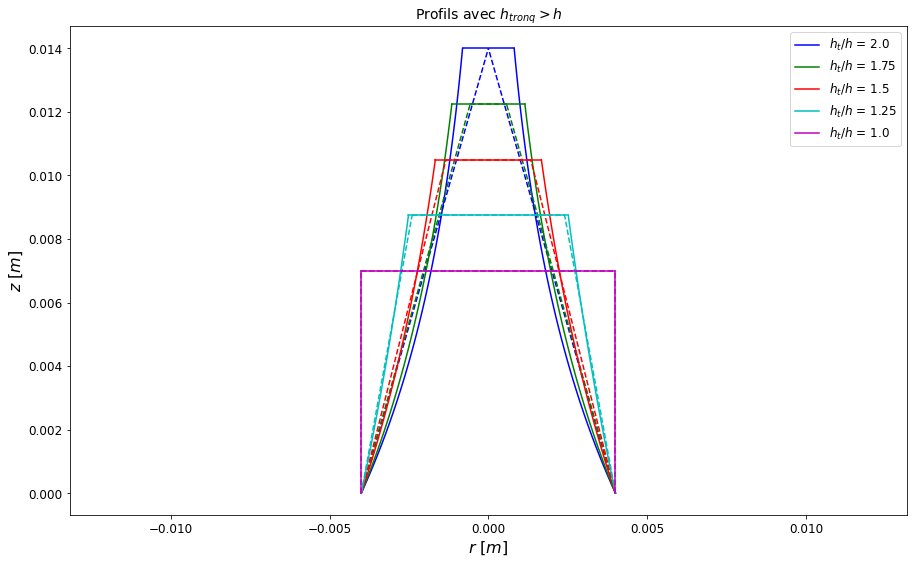

In [10]:
plt.figure(figsize=[15,9])
plt.axis('equal')

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = colors[i%9]
    z = np.linspace(0, h_tronq[i], 100)
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)))
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)
    
    ###Cône
    plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed')
    
plt.legend()

plt.title(r'Profils avec $h_{tronq} > h$')
plt.xlabel(r'$r$ [$m$]')
plt.ylabel(r'$z$ [$m$]')
    

In [11]:
h_tronq = np.linspace(h/2.5, h, 7)
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))

In [12]:
print(h_tronq)

[0.0028 0.0035 0.0042 0.0049 0.0056 0.0063 0.007 ]


0.02
0.014
0.01
0.008
0.006
0.005
0.004


Text(0, 0.5, '$z$ [$m$]')

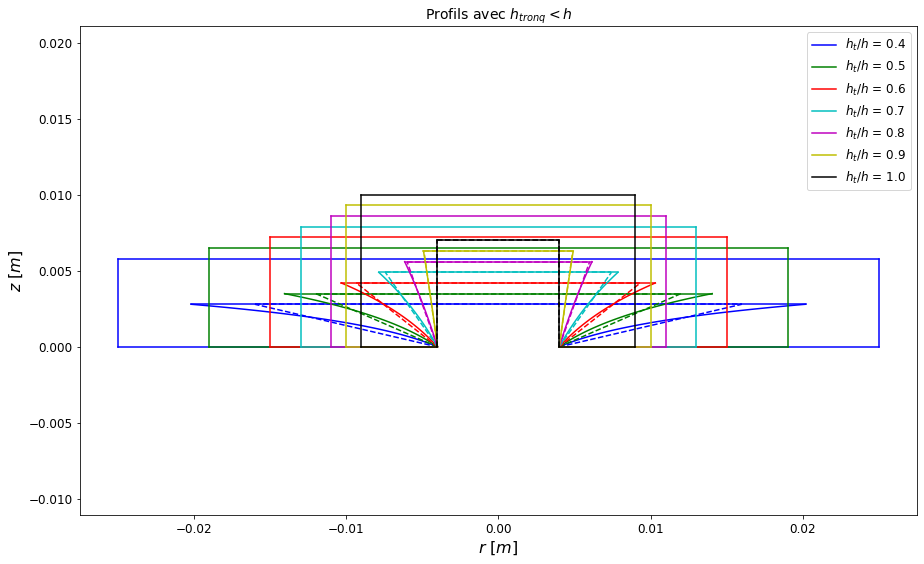

In [13]:
plt.figure(figsize=[15,9])
plt.axis('equal')

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = colors[i%9]
    z = np.linspace(0, h_tronq[i], 100)
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)))
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)
    
    a_t = round(a_exp(a0, lambd[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c)
    ###Cône
    plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed')
    
plt.legend()

plt.title(r'Profils avec $h_{tronq} < h$')
plt.xlabel(r'$r$ [$m$]')
plt.ylabel(r'$z$ [$m$]')
    

No handles with labels found to put in legend.


0.02
0.016
0.014
0.012
0.01
0.009
0.008
0.007
0.006
0.006
0.005
0.005
0.004
0.004


Text(0, 0.5, '$z$ [$m$]')

<Figure size 1080x648 with 0 Axes>

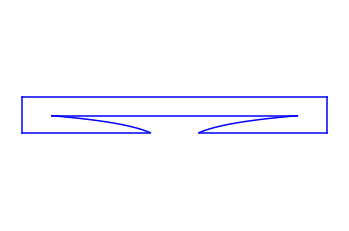

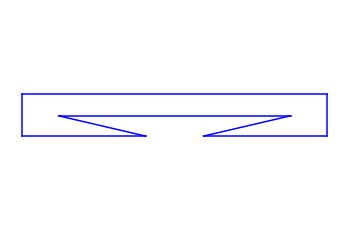

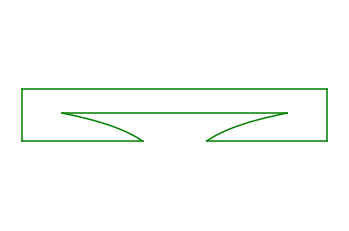

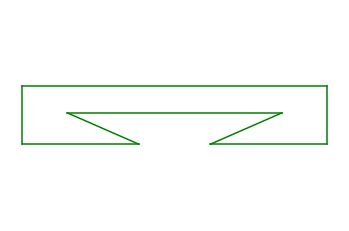

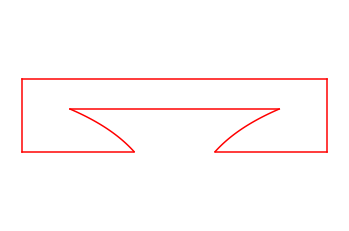

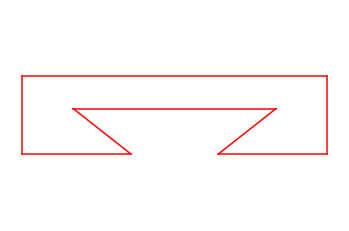

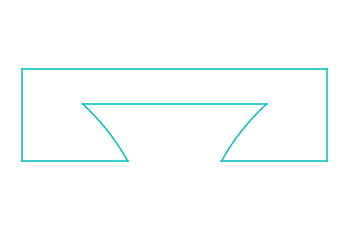

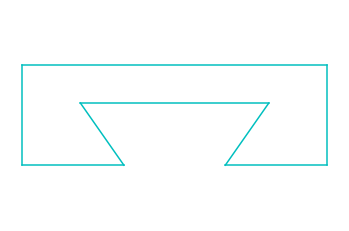

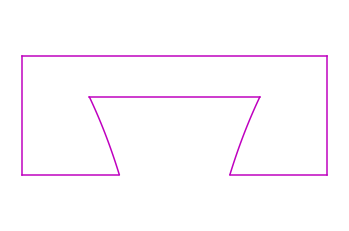

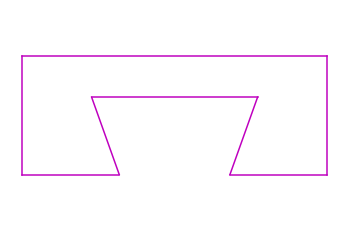

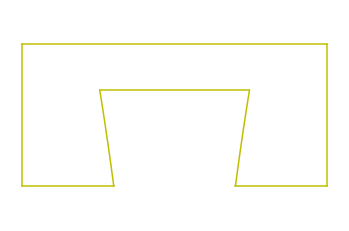

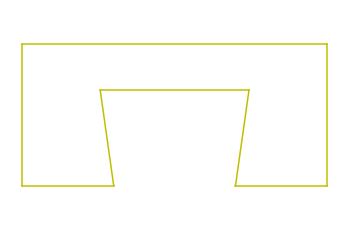

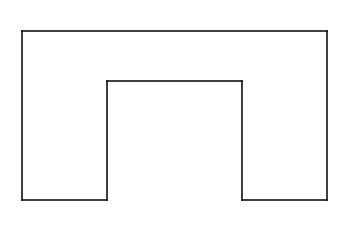

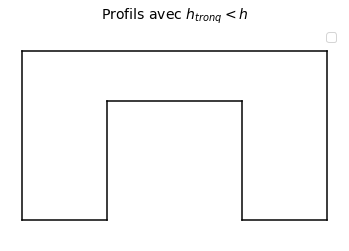

In [14]:
plt.figure(figsize=[15,9])

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = colors[i%9]
    z = np.linspace(0, h_tronq[i], 100)
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)))
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)
    
    a_t = round(a_exp(a0, lambd[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c)
    ###Cône
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    plt.plot(a_cone(a0, beta[i], z), z, color=c,)
    plt.plot(-a_cone(a0, beta[i], z), z, color=c)
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)
    
    a_t = round(a_cone(a0, beta[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c)
    
plt.legend()

plt.title(r'Profils avec $h_{tronq} < h$')
plt.xlabel(r'$r$ [$m$]')
plt.ylabel(r'$z$ [$m$]')
    

[0.014  0.0126 0.0112 0.0098 0.0084]
0.001
BaseExp >> 0.012
0.0
BaseCone >> 0.01
0.001
BaseExp >> 0.012
0.0
BaseCone >> 0.01
0.001
BaseExp >> 0.012
0.001
BaseCone >> 0.012
0.002
BaseExp >> 0.014
0.002
BaseCone >> 0.014
0.003
BaseExp >> 0.016
0.003
BaseCone >> 0.016


<Figure size 1080x648 with 0 Axes>

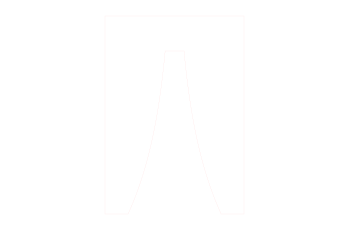

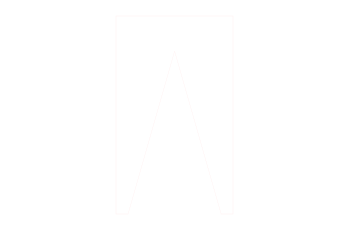

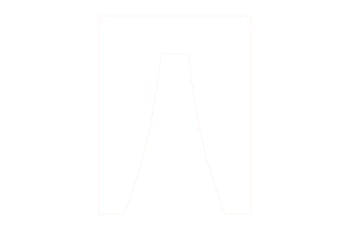

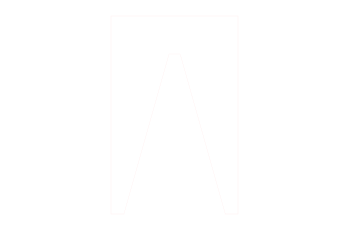

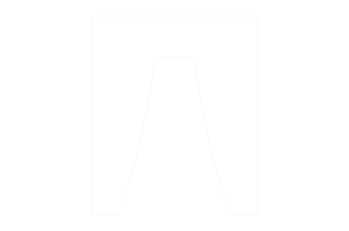

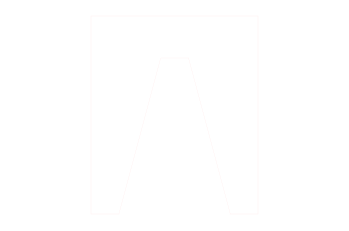

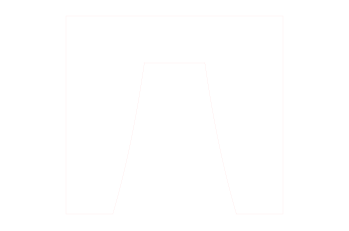

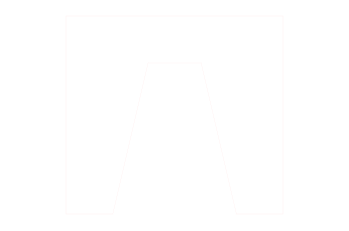

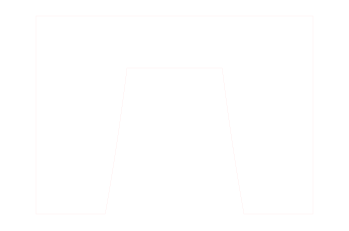

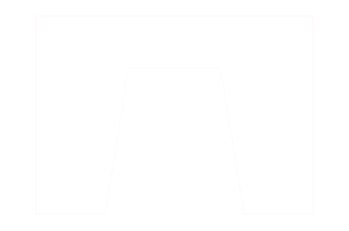

In [15]:
h_tronq = np.linspace(2*h, h+h/5, 5)
lambd = []
beta = []

print(h_tronq)

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))

plt.figure(figsize=[15,9])

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = 'red'
    l = 0.028
    z = np.linspace(0, h_tronq[i], 100)
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)), linewidth=l)
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c, linewidth=l)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c,linewidth=l)
    
    a_t = round(a_exp(a0, lambd[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c, linewidth=l)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c, linewidth=l)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c, linewidth=l)
    
    base = 2*(a_t+0.005)
    print('BaseExp >>', base)
    
    #plt.savefig("Exp_hauteur_"+str(h_tronq[i]*1e3)+"mm_base_"+str(base*1e3)+"mm.svg")
    
    ###Cône
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    
    a_t = round(a_cone(a0, beta[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c, linewidth=l)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c, linewidth=l)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c, linewidth=l)
    
    plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed', linewidth=l)
    
    base = 2*(a_t+0.005)
    print('BaseCone >>', base)
    
    #plt.savefig("Cone_hauteur_"+str(h_tronq[i]*1e3)+"mm_base_"+str(base*1e3)+"mm.svg")
    

0.02
BaseExp >> 0.05
0.016
BaseCone >> 0.042
0.013
BaseExp >> 0.036
0.011
BaseCone >> 0.032
0.009
BaseExp >> 0.027999999999999997
0.008
BaseCone >> 0.026000000000000002
0.007
BaseExp >> 0.024
0.007
BaseCone >> 0.024
0.005
BaseExp >> 0.02
0.005
BaseCone >> 0.02
0.004
BaseExp >> 0.018000000000000002
0.004
BaseCone >> 0.018000000000000002


<Figure size 1080x648 with 0 Axes>

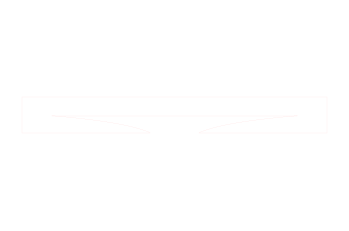

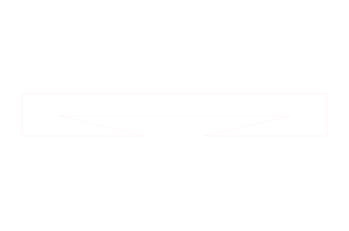

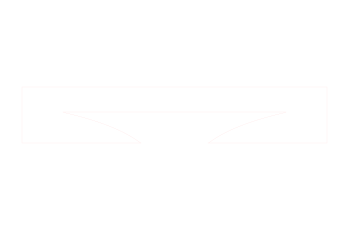

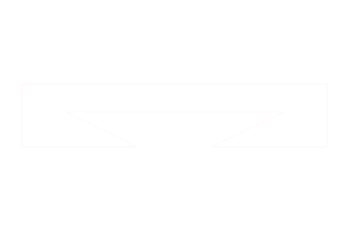

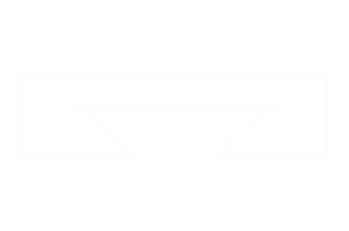

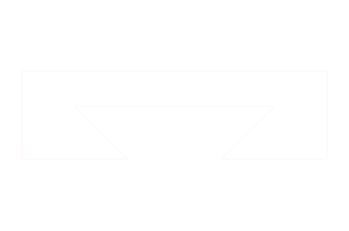

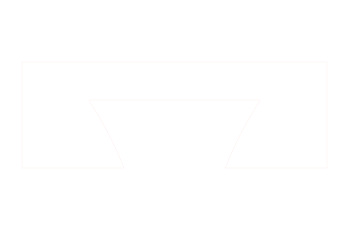

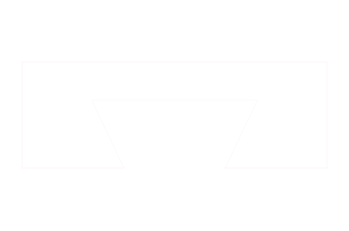

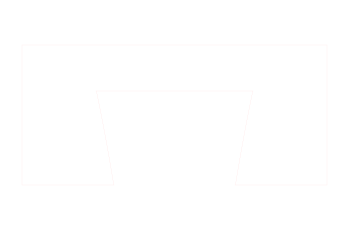

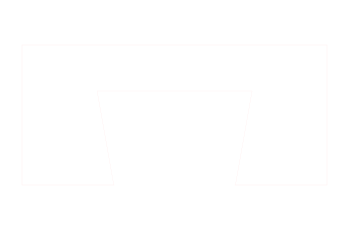

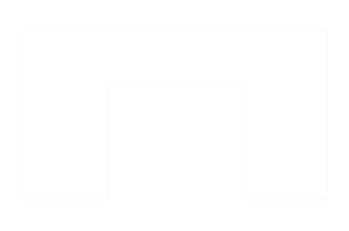

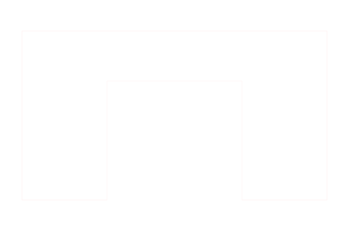

In [16]:
h_tronq = np.linspace(h/2.5, h, 6)
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))

plt.figure(figsize=[15,9])

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = 'red'
    l = 0.028
    z = np.linspace(0, h_tronq[i], 100)
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)), linewidth=l)
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c, linewidth=l)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c,linewidth=l)
    
    a_t = round(a_exp(a0, lambd[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c, linewidth=l)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c, linewidth=l)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c, linewidth=l)
    
    base = 2*(a_t+0.005)
    print('BaseExp >>', base)
    
    #plt.savefig("Exp_hauteur_"+str(h_tronq[i]*1e3)+"mm_base_"+str(base*1e3)+"mm.svg")
    
    ###Cône
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    
    a_t = round(a_cone(a0, beta[i], h_tronq[i]), 3)
    print(a_t)
    plt.plot([-a_exp(a0, lambd[i], 0), -a_t - 0.005], [0, 0], color=c, linewidth=l)
    plt.plot([a_exp(a0, lambd[i], 0), a_t + 0.005], [0, 0], color=c, linewidth=l)
    
    plt.plot([-a_t-0.005, -a_t-0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([a_t+0.005, a_t+0.005], [0, h_tronq[i]+0.003], color=c, linewidth=l)
    plt.plot([-a_t-0.005, a_t+0.005], [h_tronq[i]+0.003, h_tronq[i]+0.003], color=c, linewidth=l)
    
    plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed', linewidth=l)
    
    base = 2*(a_t+0.005)
    print('BaseCone >>', base)
    
    #plt.savefig("Cone_hauteur_"+str(h_tronq[i]*1e3)+"mm_base_"+str(base*1e3)+"mm.svg")
    

Visualisation des profils sans les contours

[0.0028  0.00364 0.00448 0.00532 0.00616 0.007  ]
0.0028
0.00364
0.0044800000000000005
0.00532
0.0061600000000000005
0.007


<Figure size 1080x648 with 0 Axes>

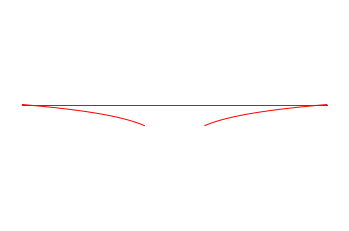

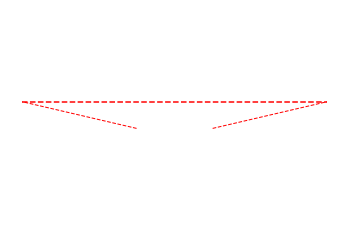

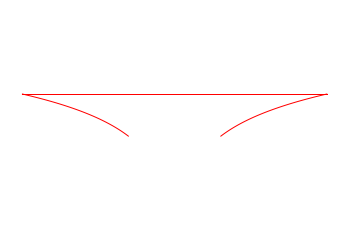

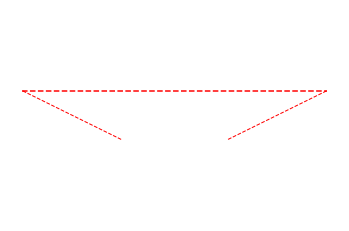

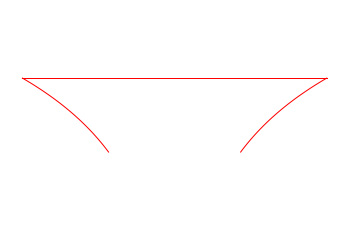

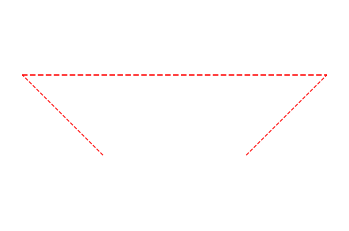

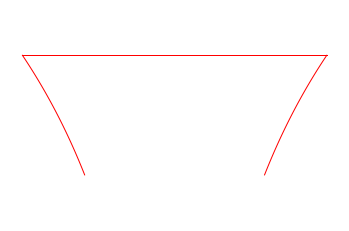

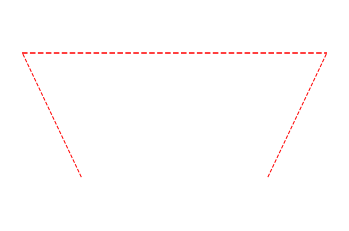

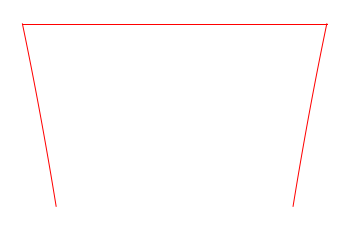

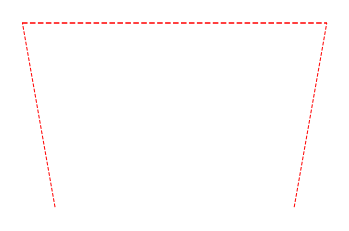

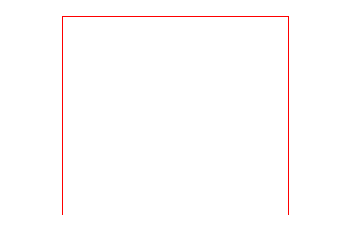

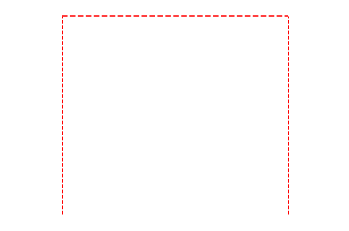

In [16]:
h_tronq = np.linspace(h/2.5, h, 6)
lambd = []
beta = []

print(h_tronq)

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))

plt.figure(figsize=[15,9])

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = 'red'
    l = 1
    z = np.linspace(0, h_tronq[i], 100)
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    print(h_tronq[i])
    
    ###Exponentielle
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {}'.format(round(h_tronq[i]/h,3)), linewidth=l)
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c, linewidth=l)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c,linewidth=l)
    
    plt.savefig("Expo"+str(h_tronq[i])+'mm_no_contours.svg')
    
    ###Cône
    
    plt.figure()
    plt.axis('equal')
    plt.axis("off")
    
    plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed', linewidth=l)
    plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed') 
    
    #plt.savefig("Cone_hauteur_"+str(h_tronq[i]*1e3)+"mm_base_"+str(base*1e3)+"mm.svg")
    

### Calcul des temps de congélation exponentiels

In [17]:
def temps_exp(lam, h_tronq):
    return -h_tronq/lam + (1/(lam**2))*(np.exp(lam*h_tronq)-1)

In [18]:
def temps_cone(beta, h_tronq):
    u = 1 + beta*h_tronq
    Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)
    return Dt

In [33]:
h_tronq = np.concatenate((np.linspace(h/2.5, h, 6)[0:5], np.linspace(h+h/5,2*h, 5)))
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))
    
H_t, Lambd = np.meshgrid(h_tronq, np.array(lambd))
durees_exp = temps_exp(np.array(lambd), h_tronq)
durees_cone = temps_cone(np.array(beta), h_tronq)

<ipython-input-18-8f853763b2d1>:3: RuntimeWarning: divide by zero encountered in log
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)
<ipython-input-18-8f853763b2d1>:3: RuntimeWarning: invalid value encountered in multiply
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)


In [34]:
print(h_tronq)

[0.0028  0.00364 0.00448 0.00532 0.00616 0.0084  0.0098  0.0112  0.0126
 0.014  ]


Text(0, 0.5, '$z$ [$m$]')

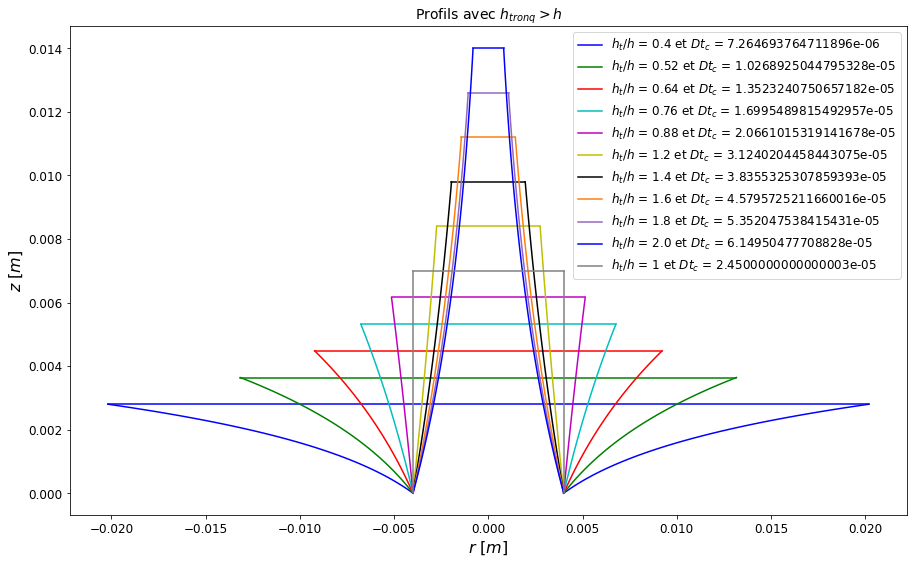

In [21]:
plt.figure(figsize=[15,9])

colors = [
    'b',        # Blue
    'g',        # Green
    'r',        # Red
    'c',        # Cyan
    'm',        # Magenta
    'y',        # Yellow
    'k',        # Black
    '#ff7f0e',  # Orange
    '#9467bd'   # Purple
]

for i in range(len(h_tronq)):
    c = colors[i%9]
    z = np.linspace(0, h_tronq[i], 100)
    
    ###Exponentielle
    
    t_c = temps_exp(lambd[i], h_tronq[i])
    if lambd[i] == 0:
        t_c = h**2/2
    
    plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {0} et $Dt_c$ = {1}'.format(round(h_tronq[i]/h,3),t_c))
    plt.plot(-a_exp(a0, lambd[i],z),z, color=c)
    plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)
    
    ###Cône
    #plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    #plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
    #plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed')

    
plt.plot([-a0, -a0], [0, h], color='gray', label=r'$h_t/h$ = {0} et $Dt_c$ = {1}'.format(1, h**2/2))
plt.plot([a0, a0], [0, h], color='gray')
plt.plot([a0, -a0], [h, h], color='gray')
    
plt.legend()

plt.title(r'Profils avec $h_{tronq} > h$')
plt.xlabel(r'$r$ [$m$]')
plt.ylabel(r'$z$ [$m$]')
    

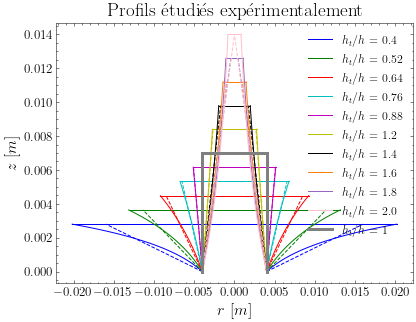

In [29]:
plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 12, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

with plt.style.context('science'):
    plt.figure(figsize=(6.4,4.8))

    colors = [
        'b',        # Blue
        'g',        # Green
        'r',        # Red
        'c',        # Cyan
        'm',        # Magenta
        'y',        # Yellow
        'k',        # Black
        '#ff7f0e',  # Orange
        '#9467bd',   # Purple
        'pink',
        'black']

    for i in range(len(h_tronq)):
        c = colors[i%11]
        z = np.linspace(0, h_tronq[i], 100)

        ###Exponentielle

        plt.plot(a_exp(a0, lambd[i], z),z, color=c, label=r'$h_t/h$ = {0}'.format(round(h_tronq[i]/h,3)))
        plt.plot(-a_exp(a0, lambd[i],z),z, color=c)
        plt.plot([-a_exp(a0, lambd[i], h_tronq[i]), a_exp(a0, lambd[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c)

        ###Cône
        plt.plot(a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
        plt.plot(-a_cone(a0, beta[i], z), z, color=c, linestyle='dashed')
        plt.plot([-a_cone(a0, beta[i], h_tronq[i]), a_cone(a0, beta[i], h_tronq[i])], [h_tronq[i],h_tronq[i]], color=c, linestyle='dashed')


    plt.plot([-a0, -a0], [0, h], color='gray', label=r'$h_t/h$ = {0}'.format(1), linewidth=3)
    plt.plot([a0, a0], [0, h], color='gray', linewidth=3)
    plt.plot([a0, -a0], [h, h], color='gray', linewidth=3)

    plt.legend()

    plt.title(r'Profils étudiés expérimentalement')
    plt.xlabel(r'$r$ [$m$]')
    plt.ylabel(r'$z$ [$m$]')
    
    #plt.savefig("Dessin des profils expérimentaux_mm.svg")

    plt.show()

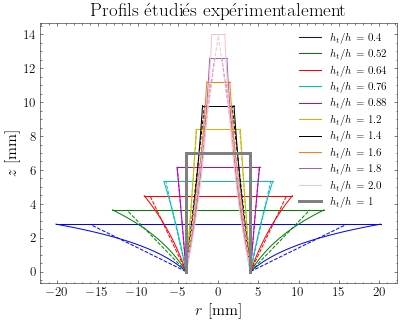

In [30]:
plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 11, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

with plt.style.context('science'):
    plt.figure(figsize=(6.4,4.8))

    colors = [
        'b',        # Blue
        'g',        # Green
        'r',        # Red
        'c',        # Cyan
        'm',        # Magenta
        'y',        # Yellow
        'k',        # Black
        '#ff7f0e',  # Orange
        '#9467bd',  # Purple
        'pink',
        'black'
    ]

    for i in range(len(h_tronq)):
        c = colors[i % 11]
        z = np.linspace(0, h_tronq[i], 100)

        ### Exponentielle
        plt.plot(1000 * a_exp(a0, lambd[i], z), 1000 * z, color=c, label=r'$h_t/h$ = {0}'.format(round(h_tronq[i]/h, 3)))
        plt.plot(-1000 * a_exp(a0, lambd[i], z), 1e3 * z, color=c)
        plt.plot([-1000 * a_exp(a0, lambd[i], h_tronq[i]), 1000 * a_exp(a0, lambd[i], h_tronq[i])], [1e3* h_tronq[i], 1e3*h_tronq[i]], color=c)

        ### Cône
        plt.plot(1000 * a_cone(a0, beta[i], z), 1e3*z, color=c, linestyle='dashed')
        plt.plot(-1000 * a_cone(a0, beta[i], z), 1e3*z, color=c, linestyle='dashed')
        plt.plot([-1000 * a_cone(a0, beta[i], h_tronq[i]), 1000 * a_cone(a0, beta[i], h_tronq[i])], [1e3*h_tronq[i], 1e3*h_tronq[i]], color=c, linestyle='dashed')

    plt.plot([-1000 * a0, -1000 * a0], [0, 1e3*h], color='gray', label=r'$h_t/h$ = {0}'.format(1), linewidth=3)
    plt.plot([1000 * a0, 1000 * a0], [0, 1e3*h], color='gray', linewidth=3)
    plt.plot([1000 * a0, -1000 * a0], [1e3*h, 1e3*h], color='gray', linewidth=3)

    plt.legend()

    plt.title(r'Profils étudiés expérimentalement')
    plt.xlabel(r'$r$ [mm]')
    plt.ylabel(r'$z$ [mm]')
    
    #plt.savefig("Dessin_des_profils_expérimentaux_mm.pdf")

    plt.show()


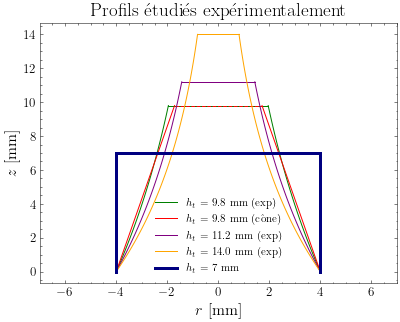

In [48]:
plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 11, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

with plt.style.context('science'):
    plt.figure(figsize=(6.4,4.8))

    colors = [
        'b',        # Blue
        'g',        # Green
        'r',        # Red
        'c',        # Cyan
        'm',        # Magenta
        'y',        # Yellow
        'k',        # Black
        '#ff7f0e',  # Orange
        '#9467bd',  # Purple
        'pink',
        'black'
    ]

    for i in range(len(h_tronq)):
        c = colors[i % 11]
        z = np.linspace(0, h_tronq[i], 100)

        ### Exponentielle
        if h_tronq[i] in [0.0098, 0.0112, 0.014]:
            
            if h_tronq[i] == 0.0098:
                c = "green"
            if h_tronq[i] == 0.0112:
                c = "purple"
            if h_tronq[i] == 0.014:
                c = "orange"
            
            plt.plot(1000 * a_exp(a0, lambd[i], z), 1000 * z, color=c, label=r'$h_t$ = {0} mm (exp)'.format(round(h_tronq[i]*1e3,3)))
            plt.plot(-1000 * a_exp(a0, lambd[i], z), 1e3 * z, color=c)
            plt.plot([-1000 * a_exp(a0, lambd[i], h_tronq[i]), 1000 * a_exp(a0, lambd[i], h_tronq[i])], [1e3* h_tronq[i], 1e3*h_tronq[i]], color=c)

        ### Cône
        if h_tronq[i] in [0.0098]:
            c = 'red'
            plt.plot(1000 * a_cone(a0, beta[i], z), 1e3*z, color=c, label=r'$h_t$ = {0} mm (cône)'.format(round(h_tronq[i]*1e3, 3)))
            plt.plot(-1000 * a_cone(a0, beta[i], z), 1e3*z, color=c)
            plt.plot([-1000 * a_cone(a0, beta[i], h_tronq[i]), 1000 * a_cone(a0, beta[i], h_tronq[i])], [1e3*h_tronq[i], 1e3*h_tronq[i]], color=c, linestyle='dashed')

    plt.plot([-1000 * a0, -1000 * a0], [0, 1e3*h], color='navy', label=r'$h_t$ = {0} mm'.format(7), linewidth=3)
    plt.plot([1000 * a0, 1000 * a0], [0, 1e3*h], color='navy', linewidth=3)
    plt.plot([1000 * a0, -1000 * a0], [1e3*h, 1e3*h], color='navy', linewidth=3)

    plt.legend()
    
    plt.xlim(-7, 7)

    plt.title(r'Profils étudiés expérimentalement')
    plt.xlabel(r'$r$ [mm]')
    plt.ylabel(r'$z$ [mm]')
    
    plt.savefig("Profil_front.pdf")

    plt.show()


Considérons que $D_{th} St / T = 6,9.10^{-9}$

In [173]:
D_sans_T = 6.9e-9

In [197]:
h_tronq = np.concatenate((np.linspace(h/2.5, h, 10)[0:9], np.linspace(h+h/5,2*h, 10)))
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))
    
H_t, Lambd = np.meshgrid(h_tronq, np.array(lambd))
durees_exp = temps_exp(np.array(lambd), h_tronq)
durees_cone = temps_cone(np.array(beta), h_tronq)

<ipython-input-190-8f853763b2d1>:3: RuntimeWarning: divide by zero encountered in log
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)
<ipython-input-190-8f853763b2d1>:3: RuntimeWarning: invalid value encountered in multiply
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)


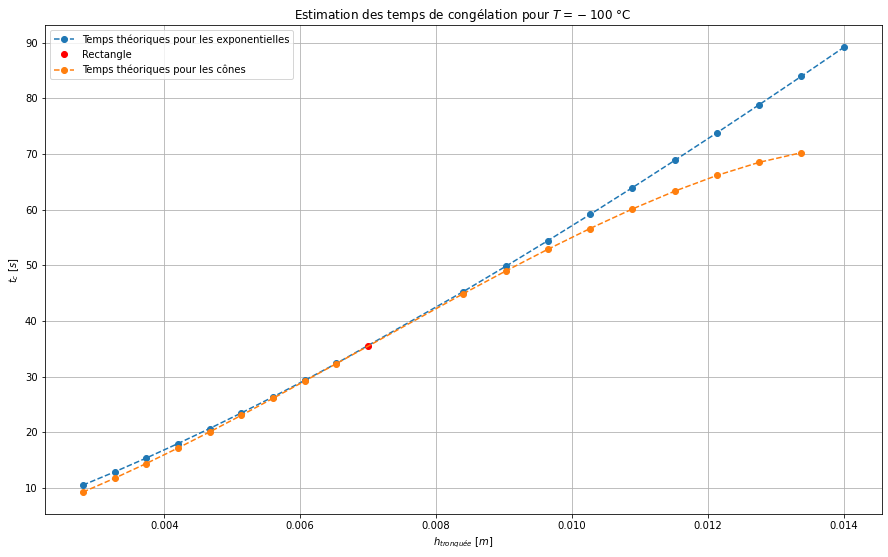

In [198]:
T = 100 #-T en réalité
D = D_sans_T*T

plt.figure(figsize=[15,9])
plt.plot(h_tronq, durees_exp/D, '--o', label="Temps théoriques pour les exponentielles")
plt.plot([0.007], [h**2/(2*D)], 'o', color='red', label='Rectangle')

plt.plot(h_tronq, durees_cone/D, '--o', label="Temps théoriques pour les cônes")


plt.xlabel(r'$h_{tronquée}$ [$m$]')
plt.ylabel(r'$t_c$ [$s$]')

plt.title(r'Estimation des temps de congélation pour $T = -100$ °C')
plt.grid()

plt.legend()

**Conjecture :** Ce sont les profils croissants qui minimisent le temps de congélation. Qui l'aurait cru ?

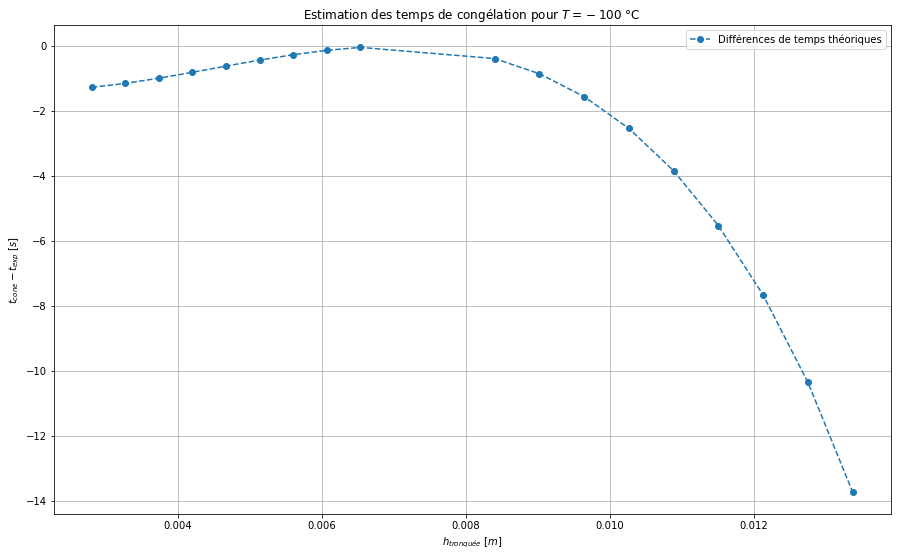

In [204]:
T = 100 #-T en réalité
D = D_sans_T*T

plt.figure(figsize=[15,9])
plt.plot(h_tronq, (durees_cone-durees_exp)/D, '--o', label="Différences de temps théoriques")

plt.xlabel(r'$h_{tronquée}$ [$m$]')
plt.ylabel(r'$t_{cone}-t_{exp}$ [$s$]')

plt.title(r'Estimation des temps de congélation pour $T = -100$ °C')
plt.grid()

plt.legend()

**Conjecture :** Le cône gagne toujours !

In [205]:
h_tronq = np.concatenate((np.linspace(0.001, 0.0068, 100), np.linspace(0.0072,2*h, 100)))
lambd = []
beta = []

for i in range(len(h_tronq)):
    lambd.append(find_lamb_exp(h, h_tronq[i]))
    beta.append(find_beta_cone(h, h_tronq[i]))
    
H_t, Lambd = np.meshgrid(h_tronq, np.array(lambd))
durees_exp = temps_exp(np.array(lambd), h_tronq)
durees_cone = temps_cone(np.array(beta), h_tronq)

<ipython-input-190-8f853763b2d1>:3: RuntimeWarning: divide by zero encountered in log
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)
<ipython-input-190-8f853763b2d1>:3: RuntimeWarning: invalid value encountered in multiply
  Dt = 1/(2*beta**2)*(u**2)*np.log(u) - 1/(4*beta**2)*(u**2-1)


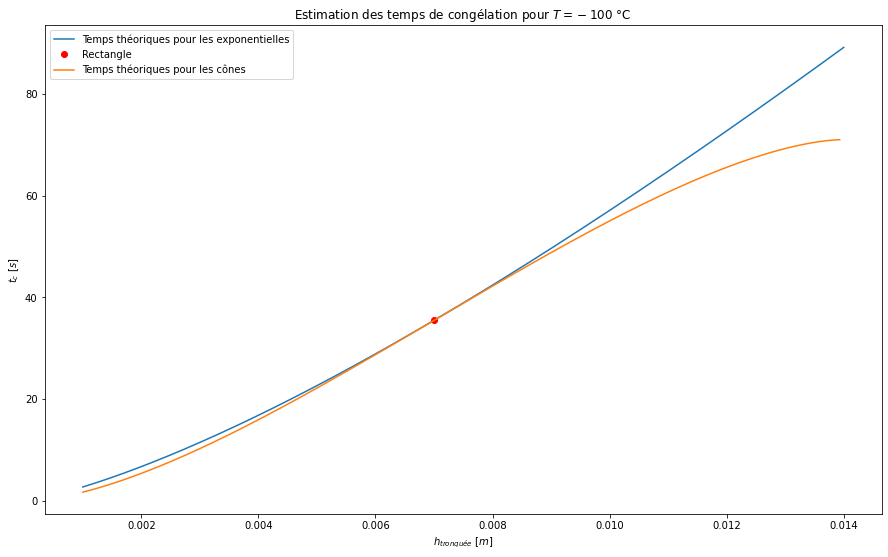

In [211]:
T = 100 #-T en réalité
D = D_sans_T*T

plt.figure(figsize=[15,9])
plt.plot(h_tronq, durees_exp/D, label="Temps théoriques pour les exponentielles")
plt.plot([0.007], [h**2/(2*D)], 'o', color='red', label='Rectangle')

plt.plot(h_tronq, durees_cone/D, label="Temps théoriques pour les cônes")


plt.xlabel(r'$h_{tronquée}$ [$m$]')
plt.ylabel(r'$t_c$ [$s$]')

plt.title(r'Estimation des temps de congélation pour $T = -100$ °C')

plt.legend()

plt.savefig("Courbe_theo.png")

**Conjecture :** La différence est plus significative pour les grandes valeurs de hauteurs.

### Profils en loi de puissance en $z^\alpha$

La condition d'aire est solvable anlytiquement mais pas le temps de congélation, on va donc faire une intégration numérique.

In [2]:
def find_mu(alpha, h, h_tronq):
    return (alpha+1)*(h-h_tronq)/(h**(alpha + 1))

In [5]:
def a_puiss(mu, alpha, a0, z):
    return a0*(1+mu*z**alpha)

In [7]:
def premiere_int(alpha, mu, z):
    result, _ = quad(lambda x: 1/(1+mu*x**alpha), 0, z)
    return result
    
def deuxieme_int(alpha, mu, h):
    result, _ = quad(lambda x: (1+mu*x**alpha)*premiere_int(alpha, mu, x), 0, h)
    return result